In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [2]:
data=pd.read_csv('data/stud.csv')
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
x=data.drop('math_score',axis=1)
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [4]:
y=data.math_score

In [5]:
num_features=[feature for feature in x.columns if x[feature].dtype!='O']
cat_features=[feature for feature in x.columns if x[feature].dtype=='O']
cat_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [6]:
num_transformer=StandardScaler()
oh_transformer=OneHotEncoder()
preprocessor=ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_features),
        ('StandardScalar',num_transformer,num_features)
        ]
        )

In [7]:
x=preprocessor.fit_transform(x)

In [8]:
x.shape

(1000, 19)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((800, 19), (200, 19))

In [10]:
def evaluate_model(actual,predicted):
    mae=mean_absolute_error(actual,predicted)
    mse=mean_squared_error(actual,predicted)
    rmse=np.sqrt(mse)
    R2_score=r2_score(actual,predicted)
    return mae,rmse,R2_score
    

In [11]:
model_list=[]
r2_list_train=[]
r2_list_test=[]
rmse_list_train = []
rmse_list_test = []
models={
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "KNearest Neighbour": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "Catboost": CatBoostRegressor(verbose=False),
    "Adaboost": AdaBoostRegressor()
}

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    
    model_train_mae,model_train_rmse,model_train_R2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_R2=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print("model performance for training set")
    print(f'Root Mean Squred Error: {model_train_rmse}')
    print(f'Mean Absolute Error: {model_train_mae}')
    print(f'R2 Score: {model_train_R2}')
    print('-'*35)
    print("model performance for test set")
    print(f'Root Mean Squred Error: {model_test_rmse}')
    print(f'Mean Absolute Error: {model_test_mae}')
    print(f'R2 Score: {model_test_R2}')
    r2_list_test.append(model_test_R2)
    r2_list_train.append(model_train_R2)
    rmse_list_train.append(model_train_rmse)
    rmse_list_test.append(model_test_rmse)
    print('='*35)
    print('\n')




Linear Regression
model performance for training set
Root Mean Squred Error: 5.329287354885032
Mean Absolute Error: 4.271484375
R2 Score: 0.874022530822051
-----------------------------------
model performance for test set
Root Mean Squred Error: 5.425185408698029
Mean Absolute Error: 4.2221875
R2 Score: 0.8790464771743793


Lasso Regression
model performance for training set
Root Mean Squred Error: 6.593815587795565
Mean Absolute Error: 5.206302661246526
R2 Score: 0.8071462015863458
-----------------------------------
model performance for test set
Root Mean Squred Error: 6.519694535667419
Mean Absolute Error: 5.157881810347763
R2 Score: 0.8253197323627853


Ridge Regression
model performance for training set
Root Mean Squred Error: 5.323324922741654
Mean Absolute Error: 4.264987823725981
R2 Score: 0.8743042615212909
-----------------------------------
model performance for test set
Root Mean Squred Error: 5.390387016935637
Mean Absolute Error: 4.21110068801426
R2 Score: 0.88059314850

In [12]:
model_train_rmse

5.812631796535069

In [13]:
model_comparison=pd.DataFrame(list(zip(model_list,r2_list_train,r2_list_test,rmse_list_train,rmse_list_test)),columns=['Model_Name','Train_R2','Test_R2','Train_Error_RMSE','Test_Error_RMSE']).sort_values(by=['Test_R2'],ascending=False)

In [14]:
model_comparison['difference']=model_comparison.Test_R2-model_comparison.Train_R2
model_comparison

,Model_Name,Train_R2,Test_R2,Train_Error_RMSE,Test_Error_RMSE,difference
2,Ridge Regression,0.874304,0.880593,5.323325,5.390387,0.006289
0,Linear Regression,0.874023,0.879046,5.329287,5.425185,0.005024
7,Catboost,0.958936,0.851632,3.042664,6.008632,-0.107304
5,Random Forest,0.976623,0.849149,2.295712,6.058706,-0.127474
8,Adaboost,0.850135,0.848383,5.812632,6.074069,-0.001752
6,XGBoost,0.995500,0.827797,1.007282,6.473307,-0.167703
1,Lasso Regression,0.807146,0.825320,6.593816,6.519695,0.018174
3,KNearest Neighbour,0.855488,0.783813,5.707885,7.253041,-0.071675
4,Decision Tree,0.999653,0.732944,0.279508,8.061327,-0.266710


In [15]:
model_comparison['rmse_differance']=model_comparison.Train_Error_RMSE-model_comparison.Test_Error_RMSE

In [16]:
model_comparison

,Model_Name,Train_R2,Test_R2,Train_Error_RMSE,Test_Error_RMSE,difference,rmse_differance
2,Ridge Regression,0.874304,0.880593,5.323325,5.390387,0.006289,-0.067062
0,Linear Regression,0.874023,0.879046,5.329287,5.425185,0.005024,-0.095898
7,Catboost,0.958936,0.851632,3.042664,6.008632,-0.107304,-2.965968
5,Random Forest,0.976623,0.849149,2.295712,6.058706,-0.127474,-3.762994
8,Adaboost,0.850135,0.848383,5.812632,6.074069,-0.001752,-0.261437
6,XGBoost,0.995500,0.827797,1.007282,6.473307,-0.167703,-5.466026
1,Lasso Regression,0.807146,0.825320,6.593816,6.519695,0.018174,0.074121
3,KNearest Neighbour,0.855488,0.783813,5.707885,7.253041,-0.071675,-1.545156
4,Decision Tree,0.999653,0.732944,0.279508,8.061327,-0.266710,-7.781819


In [17]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test,y_pred)
print(f'Accuracy of the model is {score}')

Accuracy of the model is 0.8790464771743793


plot y_pred and y_test

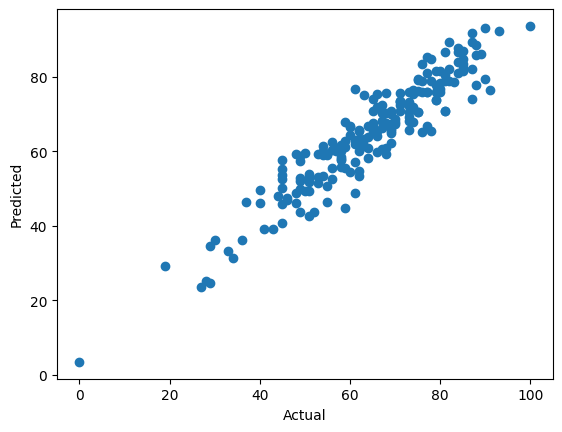

In [18]:
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

<Axes: xlabel='math_score'>

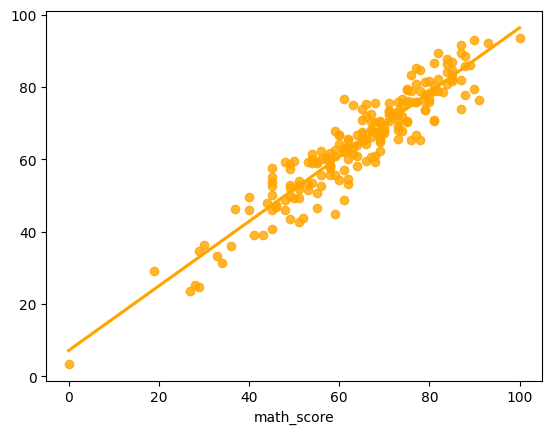

In [19]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='orange')

In [20]:
pred_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Differance':y_test-y_pred})
pred_df

,Actual,Predicted,Differance
521,91,76.4375,14.5625
737,53,59.3125,-6.3125
740,80,76.6250,3.3750
660,74,76.5625,-2.5625
411,84,87.7500,-3.7500
...,...,...,...
408,52,43.6875,8.3125
332,62,62.3125,-0.3125
208,74,67.7500,6.2500
613,65,67.0000,-2.0000
